## Introduction
Neural networks are very useful and worth exploring to solve machine learning problems. It is an algorithm mathematical model that simulates the behavioral characteristics of animal neural networks and performs distributed parallel information processing. This type of network relies on the complexity of the system to achieve the purpose of processing information by adjusting the interconnected relationships among a large number of internal nodes.

This tutorial is to introduce the PyBrain library, which aims at building neural networks to solve data processing problems. Though the PyBrain is a small library comparing to other machine learning libraries, it's quite convenient and has a good performance. This documentation will first introduce the encapsulation of data and the quick building of a network. Then we will learn how to build a network to solve a classification problem and a linear regression problem.

PyBrain module is a relatively easy-to-use neural network modeling toolkit. It has open source processing modules for supervised learning data, and the establishment of data sets and network training is also very convenient. Of course it does not only apply to supervised learning data. All in all, pybrain's ability to quickly build a variety of neural networks can still bring convenience to future work.




## installation and preparation

We'll use the numpy, scipy and matplotlib library except the PyBrain during the learning period. So make sure you have all of these in your environment first. Then the following is what we should do to install the Pybrain library.

$ git clone git://github.com/pybrain/pybrain.git

$ python setup.py install

For more detailed installation tutorial, please refer to http://wiki.github.com/pybrain/pybrain/installation.

## Build a simple network

#### Form a dataset

We should form datasets including inputs and targets before training our network. PyBrain has the pybrain.dataset for us to form our datasets. We'll use SupervisedDataSet class to illustrate more as following, which is used for standard supervised learning.

In [31]:
from pybrain.datasets import SupervisedDataSet
ds = SupervisedDataSet(2, 1)

The above cell creates a dataset which contains two dimensional inputs and one dimensional output.

Then we could add datas to the dataset.The following cell adds the inputs and output to train a XOR function.

In [32]:
ds.addSample((0, 0), (0,))
ds.addSample((0, 1), (1,))
ds.addSample((1, 0), (1,))
ds.addSample((1, 1), (0,))

#### Build a network

We could build a network with the buildNetwork as follow, the following net has 2 inputs, threee hidden neurons and an output neuron. These layer has already been connected to Fullconnection Objects.

In [33]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 3, 1)

The network adopts sigmoid squashing function by default for the hidden layer. We could flexibly change this.

In [34]:
from pybrain.structure import TanhLayer
from pybrain.structure import SoftmaxLayer
net = buildNetwork(2, 3, 1, hiddenclass=TanhLayer)

The above cell use the Tanh function for the hidden layer for the output layer.

Apart from the buildNetwork method, we could build our network from a more concrete and flexible way. Let's illustrate this with the feedforward network as an example. First we build a FeedForwardNetwork object without any parameters.

In [17]:
from pybrain.structure import FeedForwardNetwork
n = FeedForwardNetwork()

Then we could set the layers separately. The parameters in the following methods determine how many neurons does each layer have.

In [18]:
from pybrain.structure import LinearLayer, SigmoidLayer
inLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(3)
outLayer = LinearLayer(1)

Next we add the layers into the network.

In [19]:
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)

It still needs to be explicitly determined how they should be connected. For this we use the most common connection type, which produces a full connectivity between layers, by connecting each neuron of one layer with each neuron of the other. This is implemented by the FullConnection class. Then we should add the connection into the network too.

In [20]:
from pybrain.structure import FullConnection
in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)

Finally, we use the follwing call to do some internal initialization. for example, the modules are sorted topologically.

In [21]:
n.sortModules()

#### Train the network

We could use the above network and dataset for training our network with the help of the backpropagation algrithm. This call trains the net for one full epoch and returns a double proportional to the error.

In [35]:
from pybrain.supervised.trainers import BackpropTrainer
trainer = BackpropTrainer(net, ds)
trainer.train()

0.80193786038326775

In [36]:
trainer.trainUntilConvergence()

([0.22517474811751079,
  0.21682182900060601,
  0.20896542698232856,
  0.20157189191421851,
  0.19459549825564756,
  0.18799025534319461,
  0.1817039400639302,
  0.17577988482480278,
  0.17016881843526074,
  0.16483740461433805,
  0.15980104861581981,
  0.15499447248222473,
  0.15040090938108719,
  0.14606361516617325,
  0.14191375949697779,
  0.13797135106928551,
  0.13417538513450242,
  0.13058148776043735,
  0.12713740461215328,
  0.12388077124976764,
  0.12076737413695732,
  0.11778343778028533,
  0.11493042765086887,
  0.11221203206121594,
  0.10958837923690613,
  0.10707770909084359,
  0.1046565142721082,
  0.10236149728766843,
  0.10017268173955879,
  0.098048930762344097,
  0.096005921417982823,
  0.094051056246807832,
  0.092162706188148424,
  0.090348342109507304,
  0.088604310221977081,
  0.086921382117587251,
  0.085334579033544092,
  0.08378773908050513,
  0.08230396864892163,
  0.080875185813377423,
  0.079488319217214748,
  0.078155823902063604,
  0.076860431475922392,
 

The above call make the training end until convergence.

we use the .activate() method, which expects a list, tuple or an array as input.

In [37]:
net.activate([2,1])

array([-0.34661302])

## Practice One: Classification with PyBrain

We will process a classification problem, from the precess of setting up a dataset to visualize the results with PyBrain.

In [ ]:
The followings are PyBrain libraries needed.

In [38]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer

The followings are for graphical output.

In [39]:
from pylab import ion, ioff, figure, draw, contourf, clf, show, hold, plot
from scipy import diag, arange, meshgrid, where
from numpy.random import multivariate_normal


We want to generate three classed, which all obey normal distribution. First we initialize the means and the variance. We use 2-dimensional points as inputs for clearly visulization. So the initialization are as following. For each class, we have 400 inputs.

In [51]:
means = [(-1,0),(2,4),(3,1)]
cov = [diag([1,1]), diag([0.5,1.2]), diag([1.5,0.7])]
alldata = ClassificationDataSet(2, 1, nb_classes=3)
for n in range(400):
    for klass in range(3):
        input = multivariate_normal(means[klass],cov[klass])
        alldata.addSample(input, [klass])

Then we could divide our dataset into two parts, one is the training set, the other is the test set. For neural network classification, it is highly advisable to encode classes with one output neuron per class. Note that this operation duplicates the original targets and stores them in an (integer) field named ‘class', with the _convertToOneOfMany method. Since only the ClassificationDataSet has the method _convertToOneOfMany. So we must change the training set and the test set from SupervisedDataSet to ClassificationDataSet first.

In [52]:

tstdata_temp, trndata_temp = alldata.splitWithProportion(0.25)

tstdata = ClassificationDataSet(2, 1, nb_classes=3)
for n in range(0, tstdata_temp.getLength()):
    tstdata.addSample( tstdata_temp.getSample(n)[0], tstdata_temp.getSample(n)[1] )

trndata = ClassificationDataSet(2, 1, nb_classes=3)
for n in range(0, trndata_temp.getLength()):
    trndata.addSample( trndata_temp.getSample(n)[0], trndata_temp.getSample(n)[1] )
print("Number of training patterns: ", len(trndata))

trndata._convertToOneOfMany()
tstdata._convertToOneOfMany()

Number of training patterns:  900


25% of the raw dataset has been divided as test set, and 75% for the training set.

Then we could build and train our network with the dataset above. What we should pay attention to is that the input layer and output layer must correspond to the dataset. Since we do the classification, the output layer uses a softmax function.

In [53]:
fnn = buildNetwork( trndata.indim, 5, trndata.outdim, outclass=SoftmaxLayer)
trainer = BackpropTrainer( fnn, dataset=trndata, momentum=0.1, verbose=True, weightdecay=0.01)

Now generate a square grid of data points and put it into a dataset, which we can then classify to obtain a nice contour field for visualization.

In [54]:
ticks = arange(-3.5, 6.5, 0.1)
X, Y = meshgrid(ticks, ticks) # here we generate a 2-d plane,with the ticks as the range value
griddata = ClassificationDataSet(2,1, nb_classes=3)
for i in range(X.size):
    griddata.addSample([X.ravel()[i],Y.ravel()[i]], [0]) # add the inputs into griddata.
griddata._convertToOneOfMany()  # this is still needed to make the fnn feel comfy

Then we could train our network.Here we train 20 times with 1 epoch in one time.

In [55]:
for i in range(20):
    trainer.trainEpochs( 1 )

Total error:  0.0736821208972
Total error:  0.035530374686
Total error:  0.024584318864
Total error:  0.0200973242223
Total error:  0.0177248410822
Total error:  0.0161721010931
Total error:  0.0152092384641
Total error:  0.0145223712535
Total error:  0.0140938491402
Total error:  0.0137798340821
Total error:  0.0136043612494
Total error:  0.0134528978352
Total error:  0.0133990996835
Total error:  0.0132661065907
Total error:  0.0132965118485
Total error:  0.0131383826134
Total error:  0.0132667399516
Total error:  0.0130700316935
Total error:  0.0132162389365
Total error:  0.0131611474466


Here we use testOnClassData() method and the percentError function to calculate the percent error to the output on the training set and test set. 

In [56]:
trnresult = percentError( trainer.testOnClassData(),
                              trndata['class'] )
tstresult = percentError( trainer.testOnClassData(
           dataset=tstdata ), tstdata['class'] )

print("epoch: %d" % trainer.totalepochs, "  train error: %.2f%%" % trnresult, "  test error: %.2f%%" % tstresult)

epoch: 20   train error: 4.22%   test error: 6.00%


Run our grid data through the FNN, get the most likely class and shape it into a square array again.

In [57]:
out = fnn.activateOnDataset(griddata)
out = out.argmax(axis=1)  # the highest output activation gives the class
out = out.reshape(X.shape)

Now we could show the result with the plot as follows.

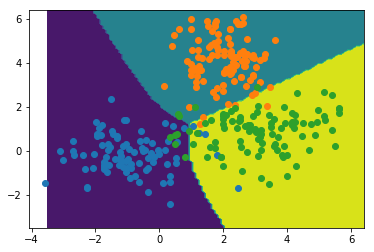

In [58]:
figure(1)
for c in [0,1,2]:
    here, _ = where(tstdata['class']==c)
    plot(tstdata['input'][here,0],tstdata['input'][here,1],'o')
contourf(X, Y, out)   # plot the contour
ioff()
show()

## Practice Two: Linear Regression with PyBrain

For preparation, we have two datasets in /data, one for training, the other for testing. We'll first train our network on the training set. 

Now we read the data from train file and store to x_train and y_train seperately.

In [59]:
import numpy as np
from math import sqrt
from pybrain.datasets.supervised import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

train_file = 'data/train.csv'
hidden_size = 100
epochs = 600 

# load data
train = np.loadtxt(train_file, delimiter = ',')

x_train = train[:,0:-1]
y_train = train[:,-1]
y_train = y_train.reshape(-1, 1)
input_size = x_train.shape[1]
target_size = y_train.shape[1]

# prepare dataset

Then we form the SupervisedDataSet object as the input of the net.

In [60]:
ds = SupervisedDataSet(input_size, target_size)
ds.setField('input', x_train)
ds.setField('target', y_train)

Finally, we train our network and print the mse of each epoch during the training process.

In [61]:
net = buildNetwork(input_size, hidden_size, target_size, bias = True)
trainer = BackpropTrainer(net,ds)


for i in range(epochs):
    mse = trainer.train()
    print("epoch : " + str(i + 1) + " mse: " + str(mse))

epoch : 1 mse: 0.22296643373
epoch : 2 mse: 0.0561892831443
epoch : 3 mse: 0.0344892424813
epoch : 4 mse: 0.0260595222727
epoch : 5 mse: 0.020794811536
epoch : 6 mse: 0.0181257939061
epoch : 7 mse: 0.0158878162451
epoch : 8 mse: 0.0143722862715
epoch : 9 mse: 0.0132074069985
epoch : 10 mse: 0.0124227916853
epoch : 11 mse: 0.0116658970605
epoch : 12 mse: 0.0111162519901
epoch : 13 mse: 0.010564477661
epoch : 14 mse: 0.010006170306
epoch : 15 mse: 0.00966808333664
epoch : 16 mse: 0.00935857659081
epoch : 17 mse: 0.00912477118066
epoch : 18 mse: 0.00887478079187
epoch : 19 mse: 0.00851130611597
epoch : 20 mse: 0.00834269016198
epoch : 21 mse: 0.00800895032429
epoch : 22 mse: 0.00796012641417
epoch : 23 mse: 0.00779838449905
epoch : 24 mse: 0.00764792541302
epoch : 25 mse: 0.00743000364209
epoch : 26 mse: 0.00736049669858
epoch : 27 mse: 0.00720774813148
epoch : 28 mse: 0.00716394186147
epoch : 29 mse: 0.00703192409051
epoch : 30 mse: 0.0068801292674
epoch : 31 mse: 0.00679593220546
epoch 

epoch : 247 mse: 0.00332662176832
epoch : 248 mse: 0.00330596442853
epoch : 249 mse: 0.00328988394377
epoch : 250 mse: 0.00327525724193
epoch : 251 mse: 0.00327425444969
epoch : 252 mse: 0.00331232034249
epoch : 253 mse: 0.0033017202812
epoch : 254 mse: 0.00328166243843
epoch : 255 mse: 0.00331097883756
epoch : 256 mse: 0.00326832741457
epoch : 257 mse: 0.00329371600751
epoch : 258 mse: 0.00329242950346
epoch : 259 mse: 0.00325851724722
epoch : 260 mse: 0.00323053775569
epoch : 261 mse: 0.00327441789629
epoch : 262 mse: 0.00328746329269
epoch : 263 mse: 0.00329131345619
epoch : 264 mse: 0.00325225345958
epoch : 265 mse: 0.00325032396234
epoch : 266 mse: 0.00326234832021
epoch : 267 mse: 0.00326300839848
epoch : 268 mse: 0.00326680296973
epoch : 269 mse: 0.00325594590879
epoch : 270 mse: 0.00326350118388
epoch : 271 mse: 0.0032188768413
epoch : 272 mse: 0.00323447966395
epoch : 273 mse: 0.00319495446291
epoch : 274 mse: 0.00325819376725
epoch : 275 mse: 0.0032462382583
epoch : 276 mse: 

epoch : 489 mse: 0.00288333819445
epoch : 490 mse: 0.00292787383281
epoch : 491 mse: 0.0028758458536
epoch : 492 mse: 0.00292652565553
epoch : 493 mse: 0.00288974178341
epoch : 494 mse: 0.0028947829905
epoch : 495 mse: 0.00286429597847
epoch : 496 mse: 0.0029025303703
epoch : 497 mse: 0.00290718200685
epoch : 498 mse: 0.00292160565514
epoch : 499 mse: 0.00290967636263
epoch : 500 mse: 0.0029111100732
epoch : 501 mse: 0.00293310914759
epoch : 502 mse: 0.00286150629932
epoch : 503 mse: 0.00285650233266
epoch : 504 mse: 0.00290021884426
epoch : 505 mse: 0.00289852948933
epoch : 506 mse: 0.00287917435959
epoch : 507 mse: 0.00289431489073
epoch : 508 mse: 0.00290841050832
epoch : 509 mse: 0.00287069459107
epoch : 510 mse: 0.00287564264352
epoch : 511 mse: 0.00289624736793
epoch : 512 mse: 0.00290820612108
epoch : 513 mse: 0.00288446665077
epoch : 514 mse: 0.00286742998785
epoch : 515 mse: 0.00288161852154
epoch : 516 mse: 0.00287238633085
epoch : 517 mse: 0.00287648126904
epoch : 518 mse: 0

Now we can test on the test set. We'll calculate the MSE between the output and the target.

In [62]:
from sklearn.metrics import mean_squared_error
test_file = "data/test.csv"
test = np.loadtxt(test_file, delimiter = ',')
x_test = test[:,0:-1]
y_test = test[:,-1]
y_test = y_test.reshape(-1, 1)

#output column
y_test_output = np.zeros(y_test.shape)

input_size = x_test.shape[1]
target_size = y_test.shape[1]
# prepare dataset

ds = SupervisedDataSet( input_size, target_size )
ds.setField('input', x_test)
ds.setField('target', y_test_output)

# predict

p = net.activateOnDataset(ds)
mse = mean_squared_error(y_test, p)
print("Testing MSE:", mse)
print(p)

Testing MSE: 0.00667683936378
[[ 0.68259456]
 [ 0.95473997]
 [ 0.42577135]
 [ 1.17111249]
 [ 0.93799493]
 [ 0.31712054]
 [ 0.543584  ]
 [ 0.3343799 ]
 [ 1.03439539]
 [ 0.60700109]
 [ 0.6401014 ]
 [ 0.71679339]
 [ 0.65422633]
 [ 0.58307116]
 [ 0.74081322]
 [ 0.35336052]
 [ 0.58785506]
 [ 1.0723286 ]
 [ 0.92049425]
 [ 0.65192294]
 [ 0.46035888]
 [ 1.06972049]
 [ 1.39554651]
 [ 0.65399696]
 [ 0.40271817]
 [ 0.82902727]
 [ 0.80963328]
 [ 0.97119978]
 [ 0.63134251]
 [ 0.85917391]
 [ 0.83905378]
 [ 0.54131148]
 [ 1.07282725]
 [ 0.72914132]
 [ 0.69350733]
 [ 0.47977387]
 [ 0.87626082]
 [ 1.38685584]
 [ 0.41260356]
 [ 0.82408331]
 [ 0.40766507]
 [ 0.749688  ]
 [ 0.73612446]
 [ 0.60145099]
 [ 0.45376053]
 [ 0.85265094]
 [ 0.61614174]
 [ 0.67920498]
 [ 0.31432014]
 [ 0.89946952]
 [ 0.95419218]
 [ 0.81446818]
 [ 1.03853221]
 [ 0.96924468]
 [ 0.43886468]
 [ 0.38963251]
 [ 0.58893579]
 [ 0.39514249]
 [ 0.26956619]
 [ 0.64043927]
 [ 0.98424354]
 [ 0.56806864]
 [ 1.1716757 ]
 [ 0.49106454]
 [ 0.97301

## Summary

During the classification and regression practice, we could know the ease of use for the PyBrain library. Actually, the PyBrain library has many details for network design. If you are interested in this, Much more detail about the libraries and questions on PyBrain are available from the following links.

[PyBrain introduction](http://pybrain.org/): The brief introduction to PyBrain.

[Quick start for PyBrain](http://pybrain.org/pages/features): A video for you to learn the library fast.

[PyBrain docs](http://pybrain.org/docs/): The tutorial for PyBrain.

